In [4]:
%pylab inline
import pandas as pd
from sklearn.cluster import DBSCAN
from statsmodels.tsa.stattools import adfuller
from pandas.tools.plotting import autocorrelation_plot
rcParams['figure.figsize'] = 25, 10

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Read raw dataset (very large)
# Don't care too much about warnings...
df = pd.read_csv('database.csv', quotechar='"')
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

C:\Users\Mario\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# df['Victim Count'].value_counts()

In [7]:
months =  ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']
months_mapping = dict(zip(months, range(1, len(months)+1)))
df['Month'] = df['Month'].map(months_mapping).astype(int)

In [8]:
from scipy.stats import kurtosis, skew
dummy =  [1,3,4,5,6,7,8,9,10,11,12]
dummy = np.asarray(dummy)
kurtosis(dummy[1:] - dummy[:-1])

5.111111111111105

In [9]:
# Select only "state" and "year" columns, counting rows (=homicidies) for each pair
df_year = df[['State','Year']].groupby(['State','Year']).size()
df_year_month=df[['State','Year', 'Month']].groupby(['State','Year', 'Month']).size()
df_month=df[['State', 'Month']].groupby(['State','Month']).size()

In [10]:
states = df['State'].drop_duplicates().tolist()

In [11]:
states[0] = 'Arkansas'
states[2] = 'Alaska'

In [12]:
# Transform in a set of time series
year_month_df = pd.DataFrame()
for sname in states:
    year_month_df[sname] = df_year_month[sname]

In [13]:
states[0] = 'Alaska'
states[2] = 'Arkansas'

In [14]:
init_year_month_df = pd.DataFrame()
for sname in states:
    init_year_month_df[sname] = (year_month_df[sname] - year_month_df[sname].mean() ) / year_month_df[sname].std()
    init_year_month_df[sname][init_year_month_df[sname].isnull()] = 0.0 # the NaN values are created as a result of the groupby operation                                             
    # given that for some states there are no recorded murders for specific years
normalized_year_month_df = pd.DataFrame()
for sname in states:
    normalized_year_month_df[sname] = init_year_month_df[sname].rolling(window=12).mean()
fin_year_month_df = pd.DataFrame()
for sname in states:
    fin_year_month_df[sname] = normalized_year_month_df[sname] - normalized_year_month_df[sname].ewm(halflife=12).mean()

In [15]:
year_df = pd.DataFrame()
for sname in states:
    year_df[sname] = df_year[sname]
init_year_df = pd.DataFrame()
for sname in states:
    init_year_df[sname] = ((year_df[sname] - year_df[sname].mean() ) / year_df[sname].std())
    init_year_df[sname][init_year_df[sname].isnull()] = 0.0 
normalized_year_df = pd.DataFrame()
for sname in states:
    normalized_year_df[sname] = init_year_df[sname].rolling(window=12).mean()
fin_year_df = pd.DataFrame()
for sname in states:
    fin_year_df[sname] = normalized_year_df[sname] - normalized_year_df[sname].ewm(halflife=10).mean()

In [16]:
month_df = pd.DataFrame()
for sname in states:
    month_df[sname] = df_month[sname]
init_month_df = pd.DataFrame()
for sname in states:
    init_month_df[sname] = (month_df[sname] - month_df[sname].mean() ) / month_df[sname].std()
    init_month_df[sname][init_month_df[sname].isnull()] = 0.0 
normalized_month_df = pd.DataFrame()
for sname in states:
    normalized_month_df[sname] = init_month_df[sname].rolling(window=12).mean()
fin_month_df = pd.DataFrame()
for sname in states:
    fin_month_df[sname] = normalized_month_df[sname] - normalized_month_df[sname].ewm(halflife=2).mean()

In [17]:
for sname in states:
    year_df[sname][year_df[sname].isnull()] = 0.0
    month_df[sname][month_df[sname].isnull()] = 0.0

C:\Users\Mario\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
matrix_series = init_month_df.T.as_matrix()

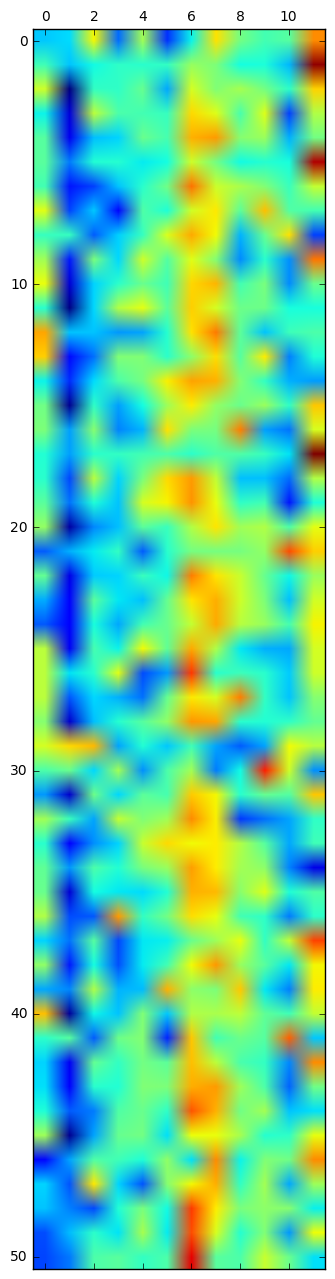

In [19]:
matshow(matrix_series, interpolation=None)
# plt.xlabel('Months', fontsize=16)
# plt.ylabel('States', fontsize=16)
# tick_params(labelbottom='on', labeltop='off')
# tick_params(axis='x', labelsize=16)
# tick_params(axis='y', labelsize=16)

In [20]:
indices = []
years = np.arange(1980, 2015)
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for year in years:
    for month in months:
        indices.append(str(year)+"-"+str(month))
indices = pd.to_datetime(indices, format='%Y-%m')
normalized_year_month_df.index = indices
year_month_df.index = indices
init_year_month_df.index = indices
fin_year_month_df.index = indices

In [21]:
year_abbreviations = ['\'80', '\'81', '\'82', '\'83', '\'84','\'85','\'86', '\'87','\'88','\'89',
       '\'90', '\'91', '\'92', '\'93', '\'94','\'95','\'96', '\'97','\'98','\'99',
       '\'00', '\'01', '\'02', '\'03', '\'04','\'05','\'06', '\'07','\'08','\'09',
       '\'10', '\'11', '\'12', '\'13', '\'14']

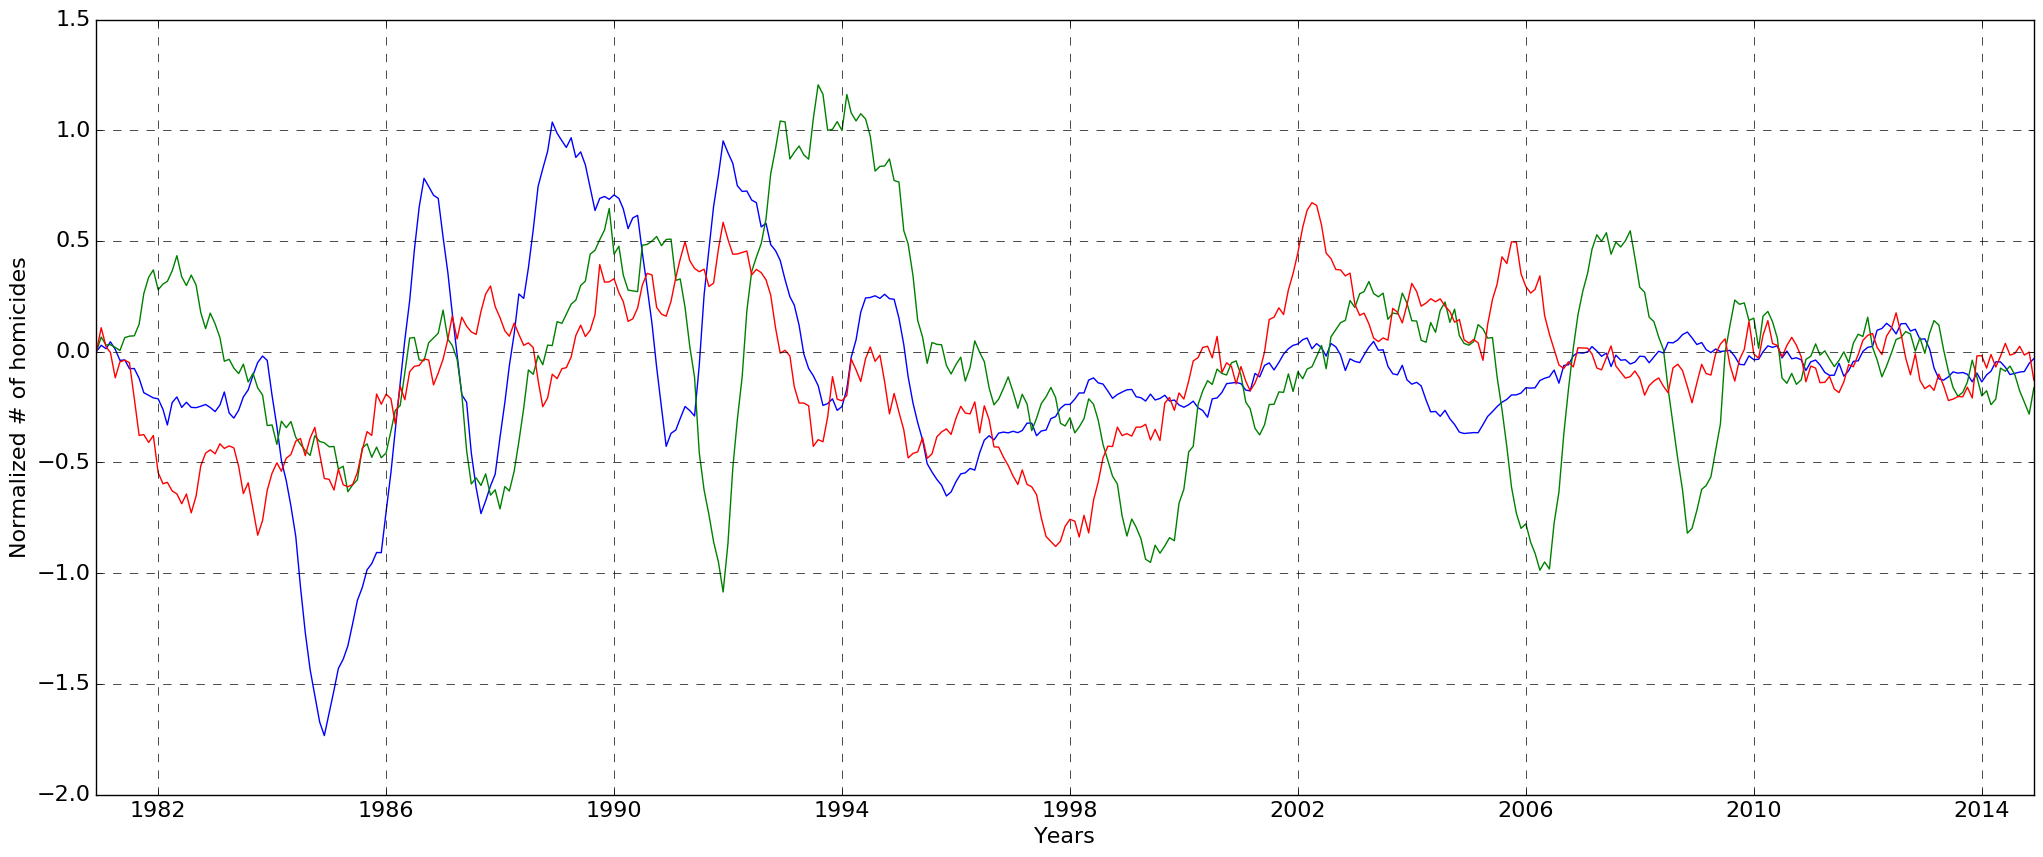

In [23]:
#     for sname in states:
plot(fin_year_month_df['Illinois'])
plot(fin_year_month_df['Louisiana'])
plot(fin_year_month_df['Ohio'])
# xticks(normalized_year_month_df.index[0:len(fin_year_month_df.index):12], year_abbreviations)
tick_params(axis='x', labelsize=16)
tick_params(axis='y', labelsize=16)
grid(color='k', linestyle='--', linewidth=0.5)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Normalized # of homicides', fontsize=16)

In [20]:
# for sname in states:
#     print sname
#     print adfuller(normalized_year_month_df[sname], autolag='AIC')
#     print adfuller(norm_year_month_df[sname],autolag='AIC')

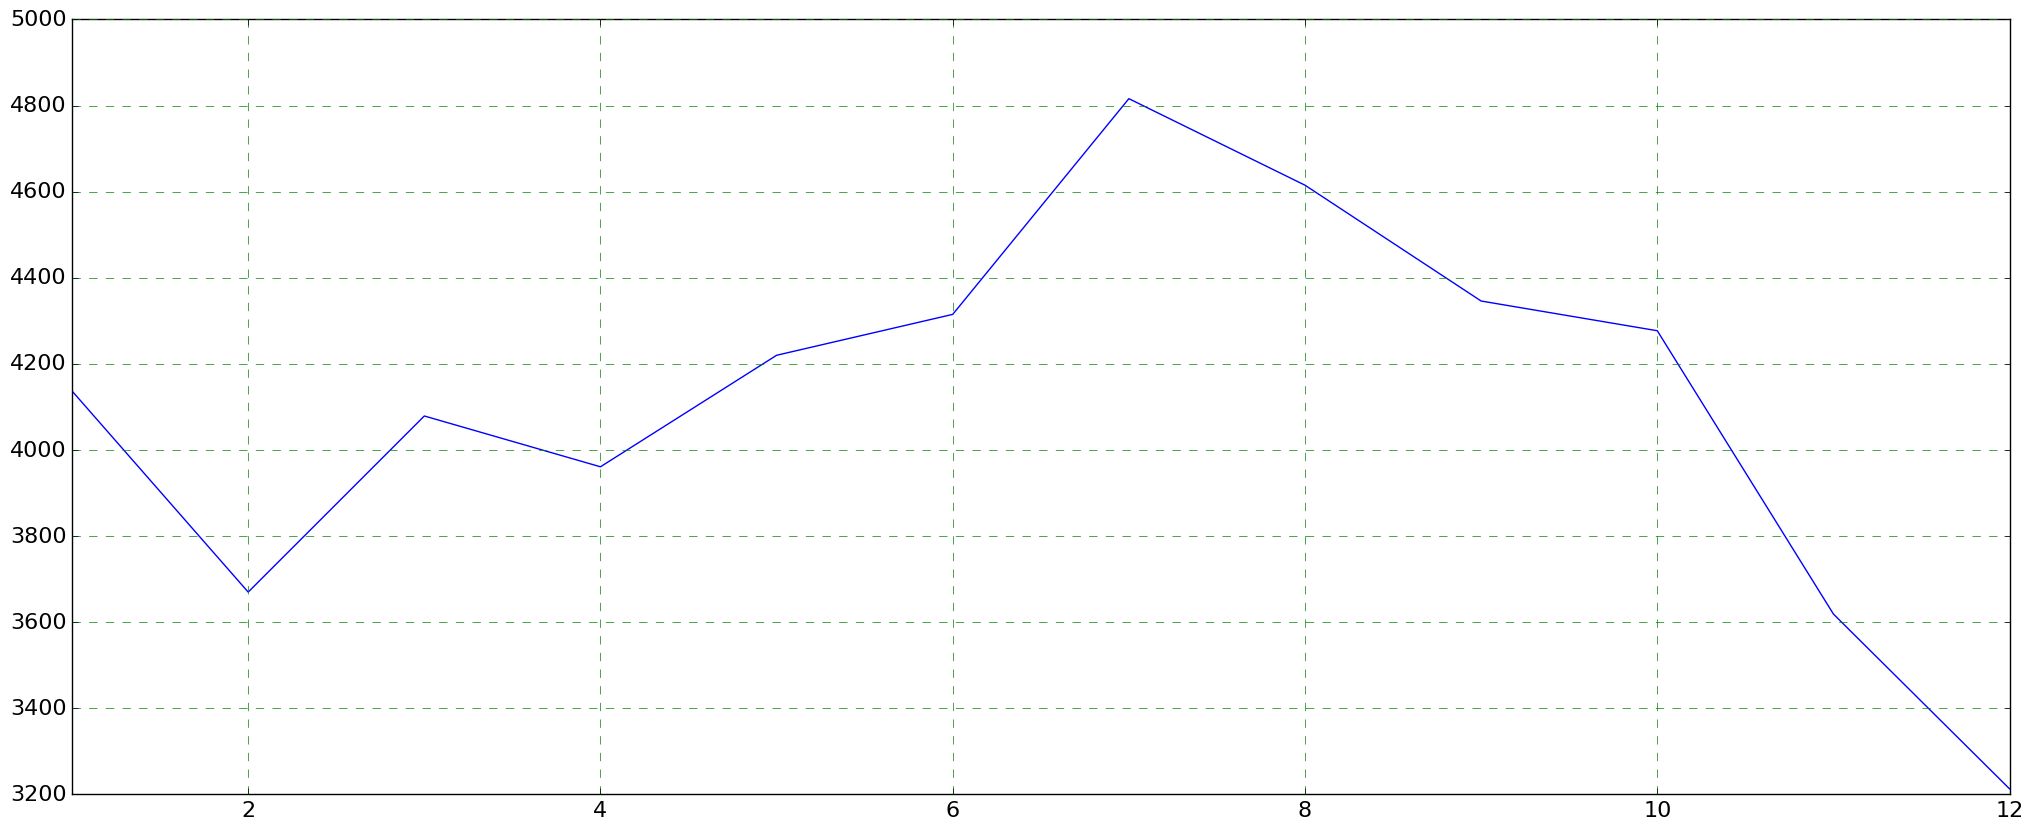

In [21]:
plot(month_df['New York'])
tick_params(axis='x', labelsize=16)
tick_params(axis='y', labelsize=16)
xlim( (1, 12) )
grid(color='g', linestyle='--', linewidth=0.5)

In [18]:
normalized_year_month_df.dropna(inplace=True)
fin_year_month_df.dropna(inplace=True)

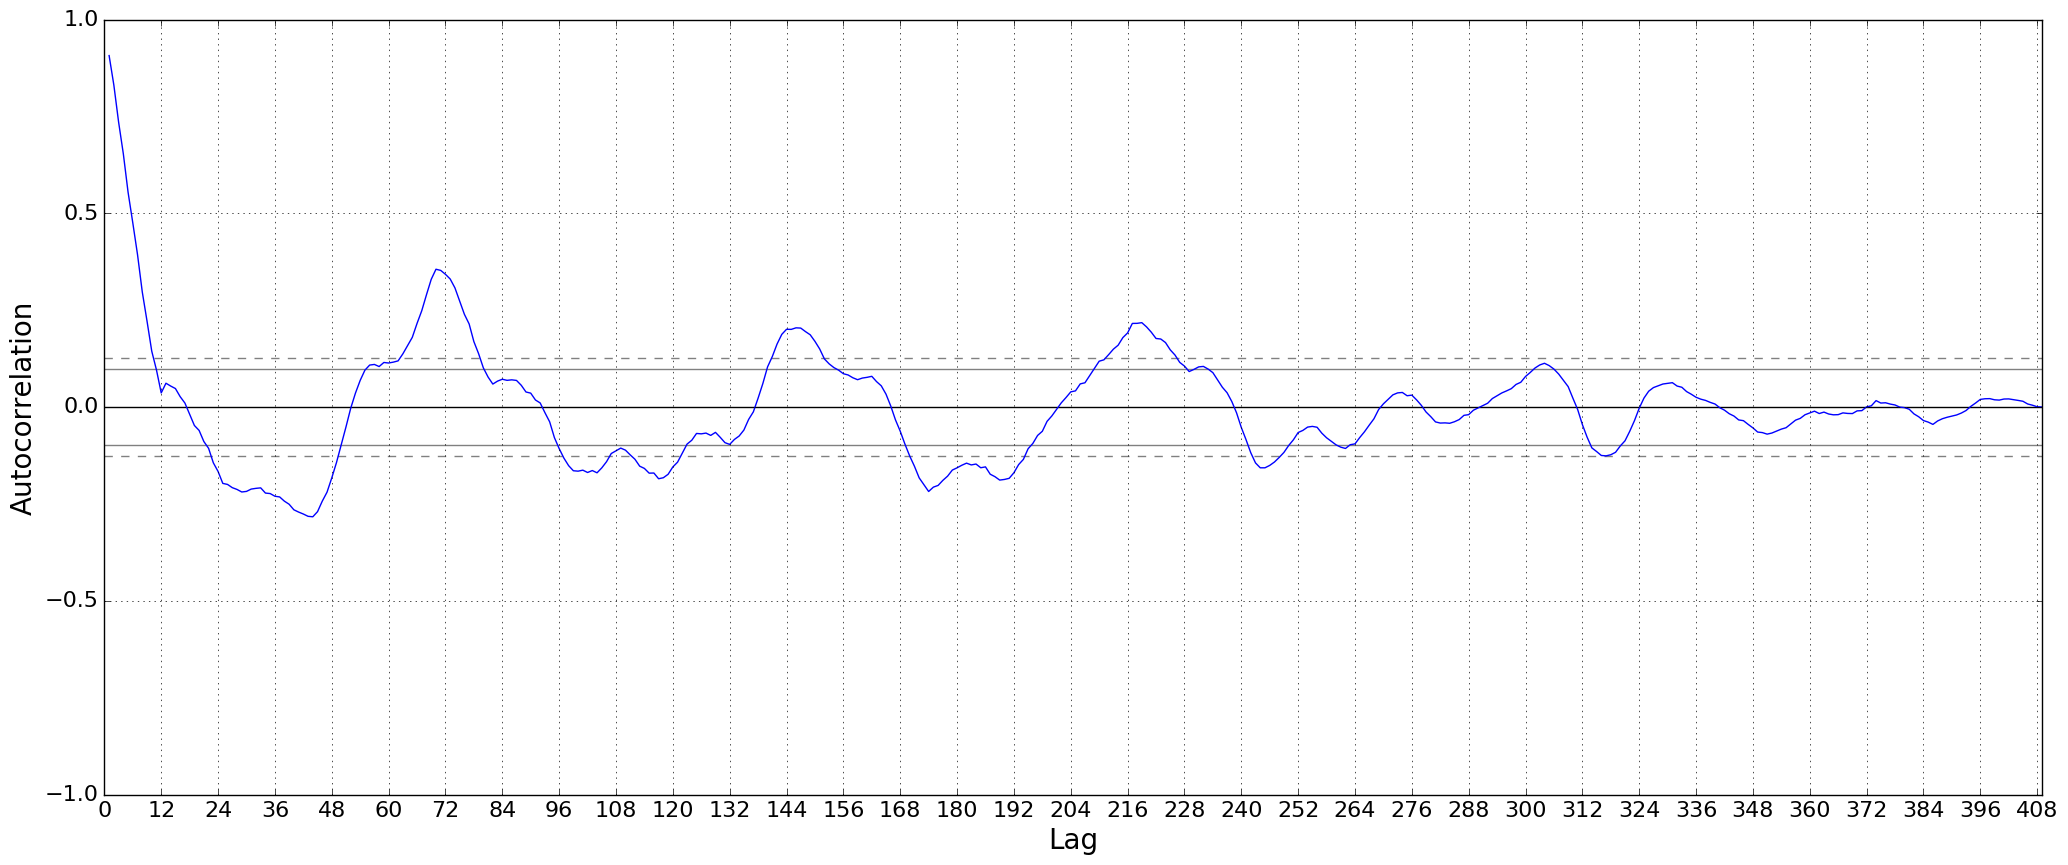

In [30]:
# for sname in states:
autocorrelation_plot(fin_year_month_df['Iowa'])
# autocorrelation_plot(fin_year_month_df['Louisiana'])
# autocorrelation_plot(fin_year_month_df['Arkansas'])
xticks(np.arange(0,409,12))
tick_params(axis='x', labelsize=16)
tick_params(axis='y', labelsize=16)
plt.xlabel('Lag', fontsize=20)
plt.ylabel('Autocorrelation', fontsize=20)
# grid(color='k', linestyle='--', linewidth=0.5)

(1980, 2014)

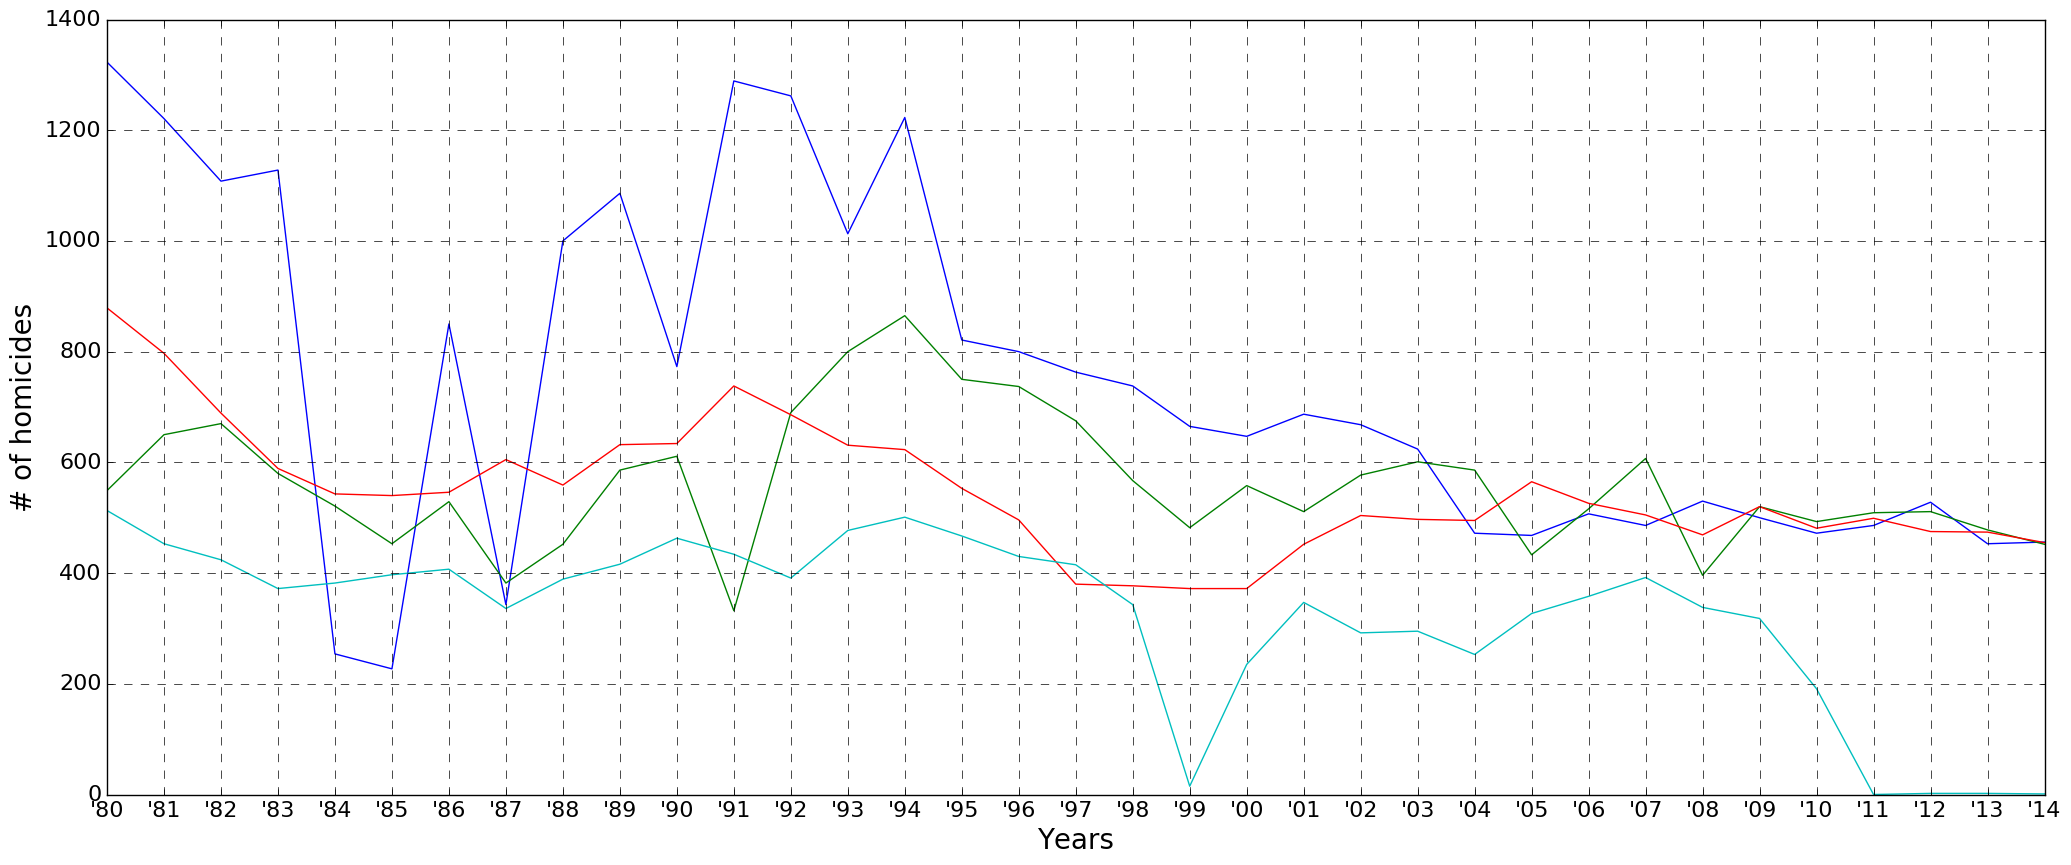

In [24]:
# for sname in states:
plot(year_df['Illinois'])
plot(year_df['Louisiana'])
plot(year_df['Ohio'])
plot(year_df['Alabama'])
xticks(year_df.index[0:len(year_df.index):1], year_abbreviations)
tick_params(axis='x', labelsize=16)
tick_params(axis='y', labelsize=16)
plt.xlabel('Years', fontsize=20)
plt.ylabel('# of homicides', fontsize=20)
grid(color='k', linestyle='--', linewidth=0.5)
xlim( (1980, 2014) )
# legend(loc='upper right', shadow=True) #California, Texas, New York

In [25]:
from dtw import dtw
def distance(x,y):
    return abs(x-y)

In [26]:
# state_list = fin_year_df.columns
# dd1 = [ [ (dtw(fin_year_month_df[state_list[x]],fin_year_month_df[state_list[y]],distance)[0] if y > x else -1)  for y in range(len(state_list)) ] 
#        for x in range(len(state_list)) ] #the for with x is the outer for
# dd2 = [ [ (dd1[x][y] if y > x else dd1[y][x])  for y in range(len(state_list)) ] for x in range(len(state_list)) ]
# for i in range(len(state_list)):
#     dd2[i][i] = 0.0

In [27]:
state_list = fin_year_df.columns
from sklearn.metrics.pairwise import euclidean_distances
dd1eu = [ [ (euclidean_distances(fin_year_month_df[state_list[x]],fin_year_month_df[state_list[y]])[0][0] if y > x else -1)  for y in range(len(state_list)) ] 
       for x in range(len(state_list)) ] #the for with x is the outer for
dd2eu = [ [ (dd1eu[x][y] if y > x else dd1eu[y][x])  for y in range(len(state_list)) ] for x in range(len(state_list)) ]
for i in range(len(state_list)):
    dd2eu[i][i] = 0.0

C:\Users\Mario\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Mario\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Mario\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarn

In [28]:
np.savetxt("dd2eu.csv", dd2eu, delimiter=",")
# dd2 = genfromtxt('dd2.csv', delimiter=',')

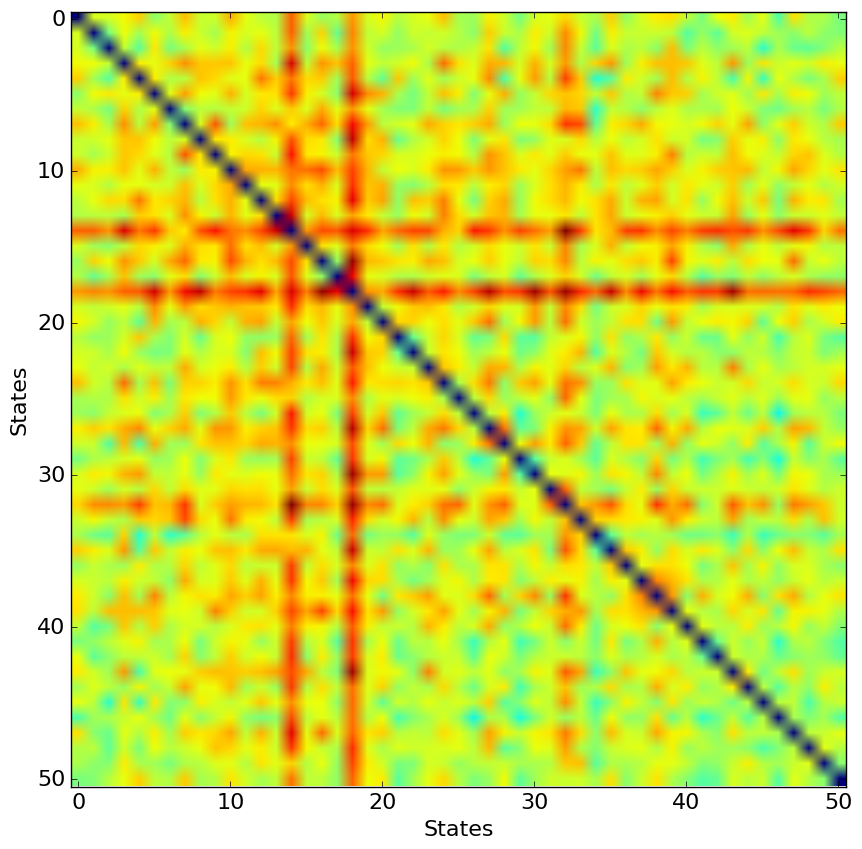

In [29]:
matshow(dd2eu, interpolation=None, aspect='auto')
plt.xlabel('States', fontsize=16)
plt.ylabel('States', fontsize=16)
tick_params(labelbottom='on', labeltop='off')
tick_params(axis='x', labelsize=16)
tick_params(axis='y', labelsize=16)

In [30]:
# for sims in dd2[18:20]: # for the first five states, plot the distance to between them and the other 50
#     print sims, value
#     plot(sims,'r-')
# grid(color='g', linestyle='--', linewidth=0.5)


In [31]:
# for sims in dd2[14:15]: # for the first five states, plot the distance to between them and the other 50
#     plot(sims,'r-')
# grid(color='g', linestyle='--', linewidth=0.5)

In [32]:
from scipy.stats import itemfreq
from sklearn.metrics import silhouette_score
db = DBSCAN(eps=7, min_samples=40, metric='precomputed').fit(dd2eu)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print 'silhouette', silhouette_score(dd2eu, db.labels_, random_state=100)
print('Estimated number of clusters: %d' % n_clusters_)
print itemfreq(db.labels_)
print db.labels_
from operator import itemgetter
sorted(zip(state_list,db.labels_),key=itemgetter(1))

silhouette 0.339186408007
Estimated number of clusters: 1
[[-1  3]
 [ 0 48]]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]


[('Illinois', -1),
 ('Kansas', -1),
 ('Louisiana', -1),
 ('Alaska', 0),
 ('Alabama', 0),
 ('Arkansas', 0),
 ('Arizona', 0),
 ('California', 0),
 ('Colorado', 0),
 ('Connecticut', 0),
 ('District of Columbia', 0),
 ('Delaware', 0),
 ('Florida', 0),
 ('Georgia', 0),
 ('Hawaii', 0),
 ('Iowa', 0),
 ('Idaho', 0),
 ('Indiana', 0),
 ('Kentucky', 0),
 ('Massachusetts', 0),
 ('Maryland', 0),
 ('Maine', 0),
 ('Michigan', 0),
 ('Minnesota', 0),
 ('Missouri', 0),
 ('Mississippi', 0),
 ('Montana', 0),
 ('Nebraska', 0),
 ('North Carolina', 0),
 ('North Dakota', 0),
 ('New Hampshire', 0),
 ('New Jersey', 0),
 ('New Mexico', 0),
 ('Nevada', 0),
 ('New York', 0),
 ('Ohio', 0),
 ('Oklahoma', 0),
 ('Oregon', 0),
 ('Pennsylvania', 0),
 ('Rhodes Island', 0),
 ('South Carolina', 0),
 ('South Dakota', 0),
 ('Tennessee', 0),
 ('Texas', 0),
 ('Utah', 0),
 ('Virginia', 0),
 ('Vermont', 0),
 ('Washington', 0),
 ('Wisconsin', 0),
 ('West Virginia', 0),
 ('Wyoming', 0)]

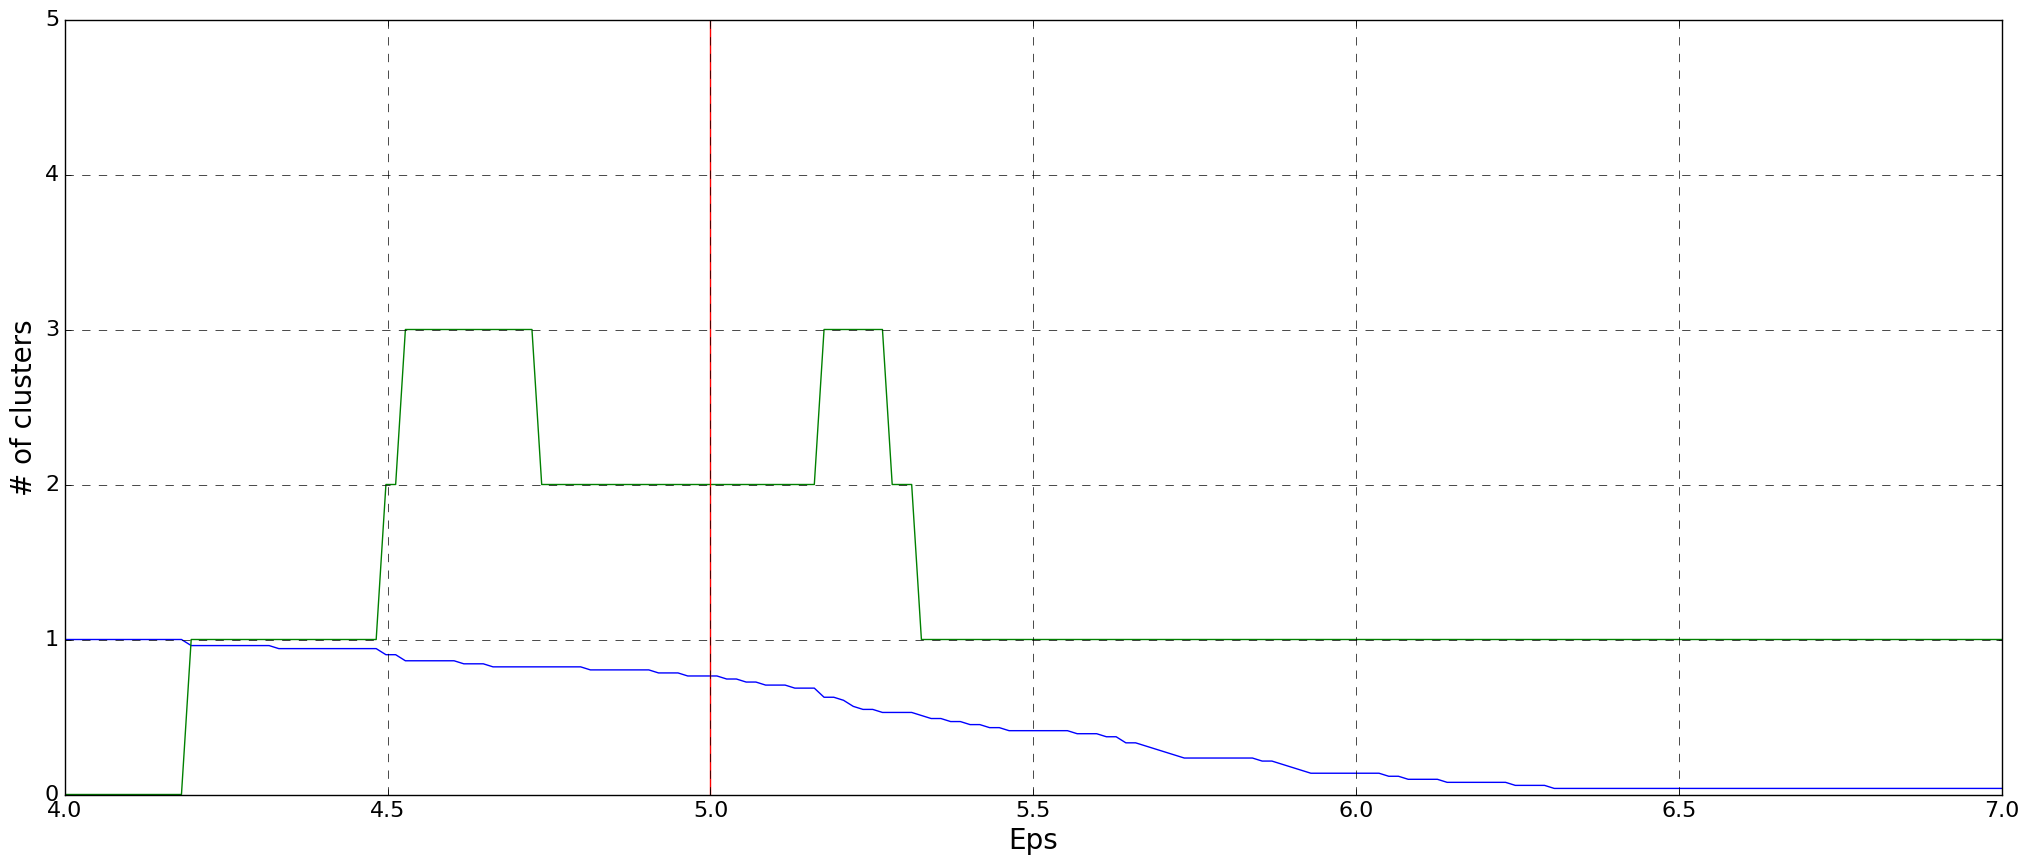

In [33]:
eps_list = linspace(4.0,7.0,num=200)
#eps_list = linspace(0.78,0.8,num=200)
noise_list = array([])
n_clusters_list = array([])
for myeps in eps_list:
    db = DBSCAN(myeps, min_samples=2, metric='precomputed').fit(dd2eu)
    noise_list = append(noise_list, sum([ 1 if i==-1 else 0 for i in db.labels_]))
    
    n_clusters_list = append(n_clusters_list, len(set(db.labels_)) - (1 if -1 in db.labels_ else 0))
plot(eps_list, noise_list/51)
plot(eps_list, n_clusters_list)
plot([5,5],[0,5],'r-')
tick_params(axis='x', labelsize=16)
tick_params(axis='y', labelsize=16)
plt.xlabel('Eps', fontsize=20)
plt.ylabel('# of clusters', fontsize=20)
grid(color='k', linestyle='--', linewidth=0.5)

Stress value:  7534.74076911


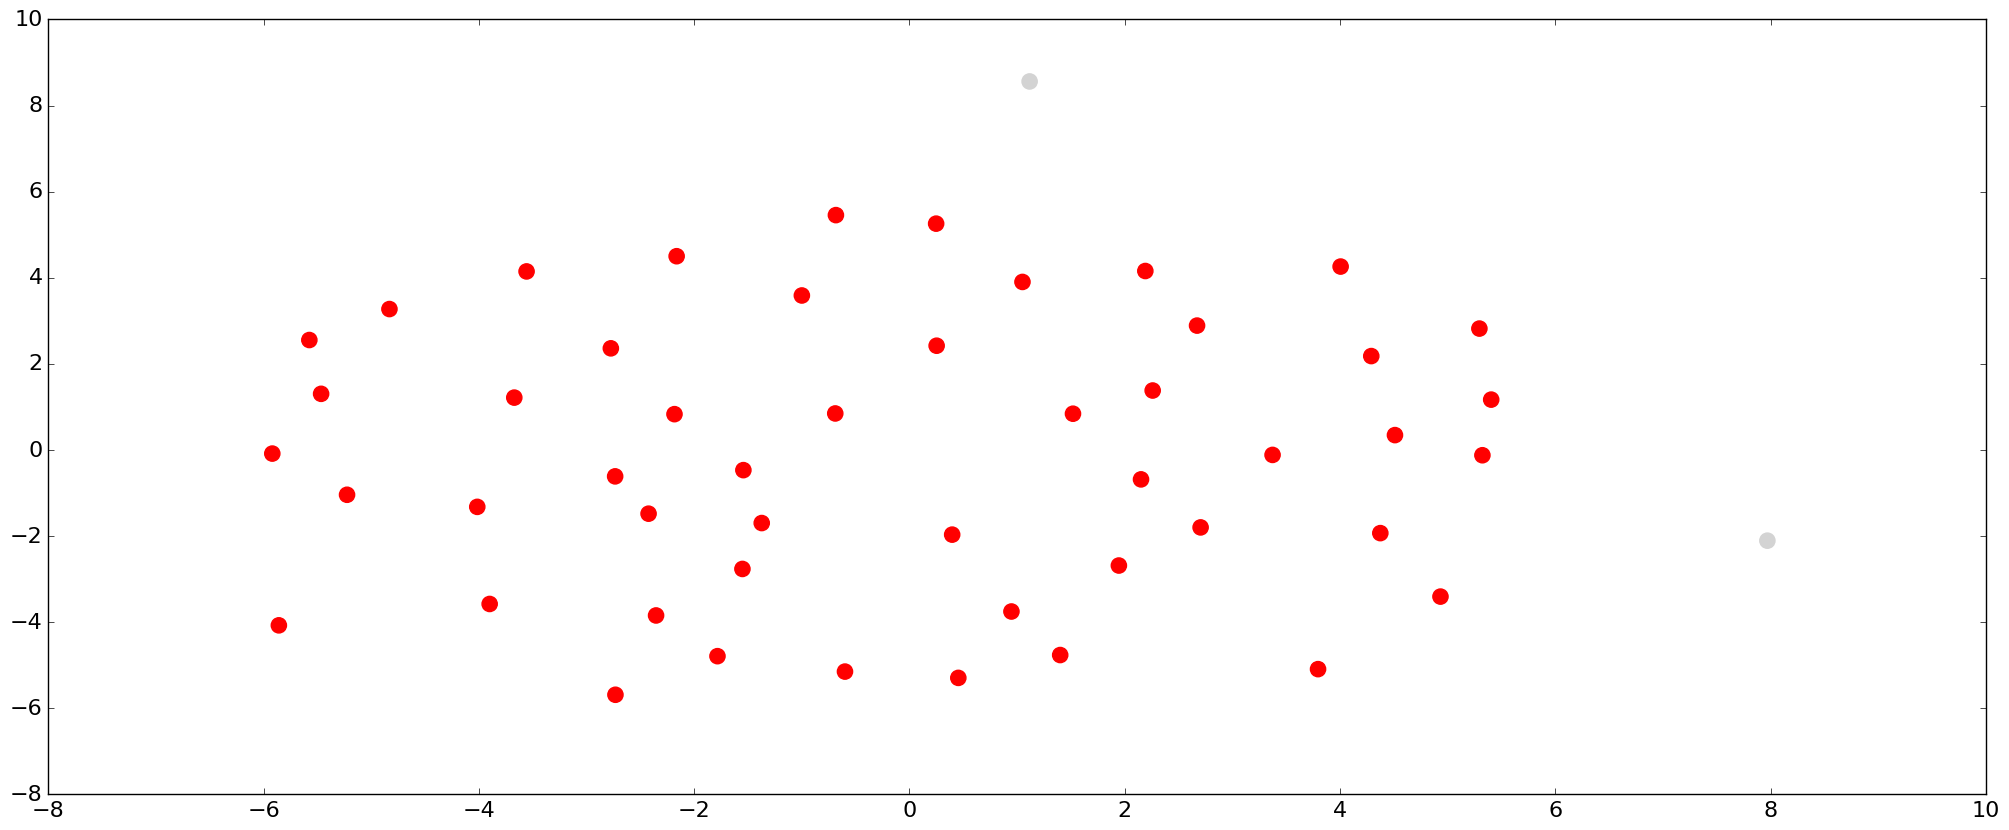

In [34]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, dissimilarity="precomputed", n_jobs=-1)
pos = mds.fit(dd2eu)
print "Stress value: ", pos.stress_

# Assign colors based on clusters
db = DBSCAN(eps=7, min_samples=3, metric='precomputed').fit(dd2eu)
cols = ['lightgray', 'red']
cc = [ cols[l+1] for l in db.labels_]
scatter(pos.embedding_.T[0], pos.embedding_.T[1], color=cc, s=120)
tick_params(axis='x', labelsize=16)
tick_params(axis='y', labelsize=16)

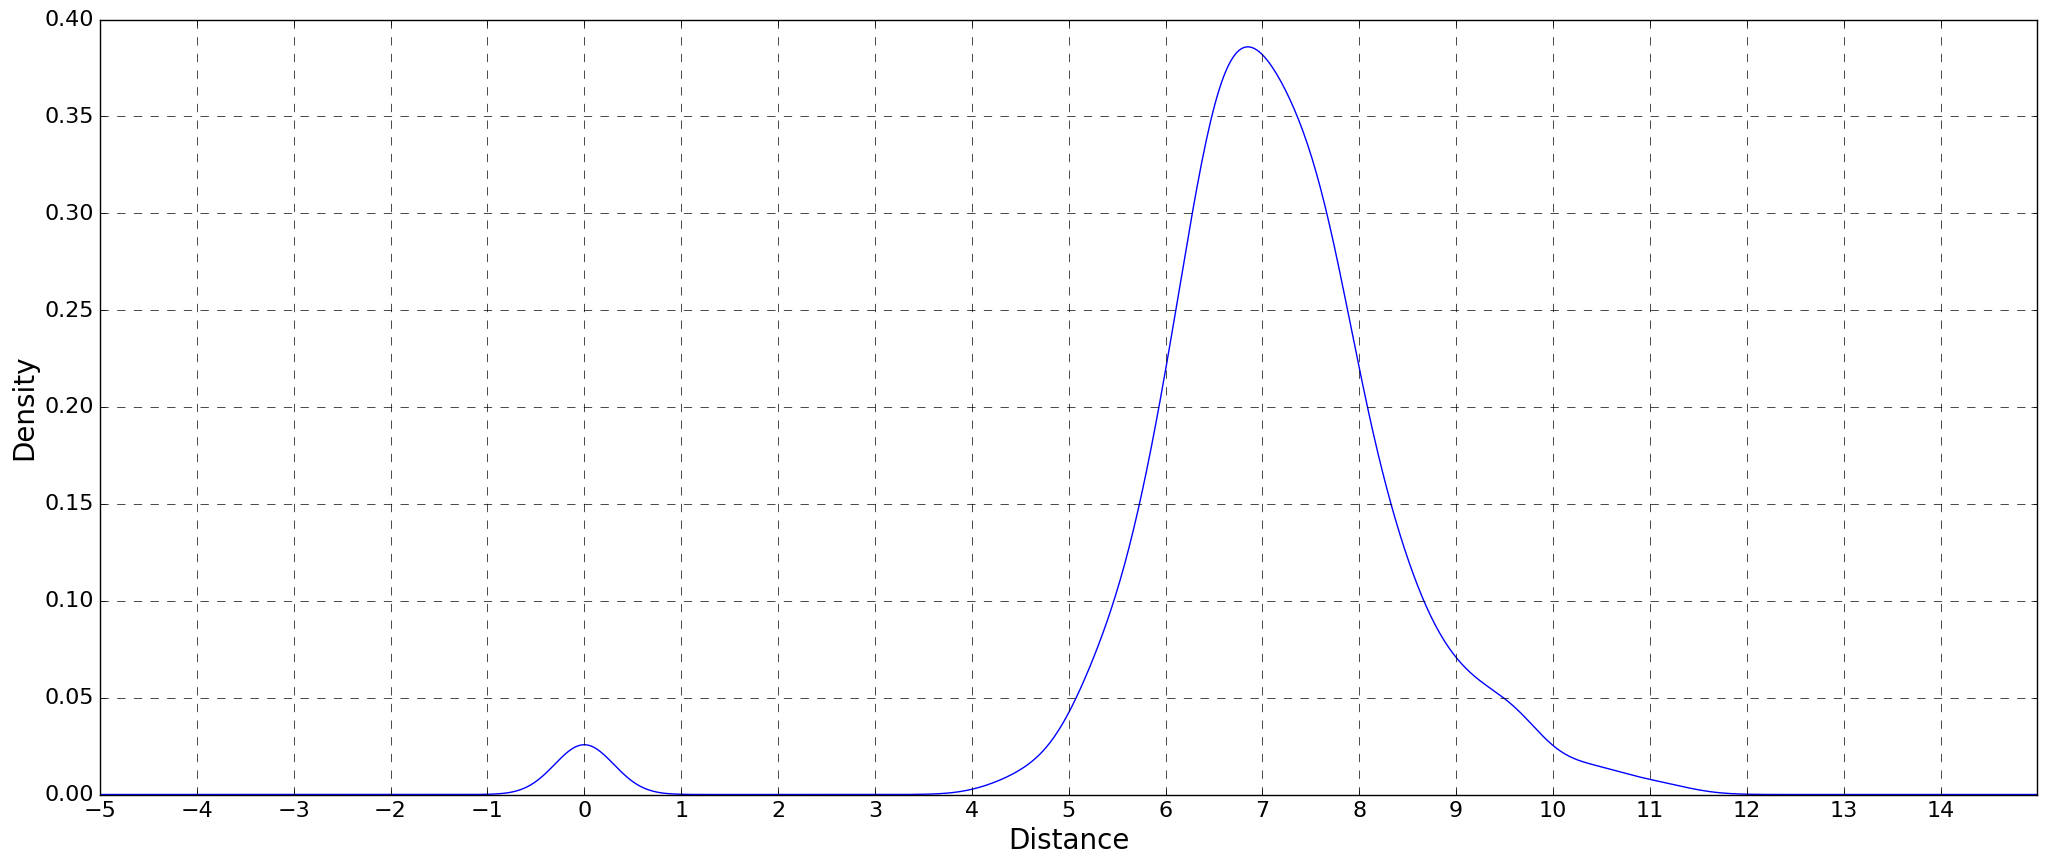

In [35]:
from pandas import Series
Series(reshape(dd2eu,(1,51*51))[0]).plot(kind='kde')
tick_params(axis='x', labelsize=16)
tick_params(axis='y', labelsize=16)
plt.xlabel('Distance', fontsize=20)
plt.ylabel('Density', fontsize=20)
xticks(np.arange(-5,15))
xlim((-5,15))
grid(color='k', linestyle='--', linewidth=0.5)

In [36]:
# normalized_year_month_df_sort=sorted(zip(array(normalized_year_month_df.T),db.labels_),key=itemgetter(1))
# normalized_year_month_df_sort2=[el[0] for el in normalized_year_month_df_sort]
# matshow(normalized_year_month_df_sort2, interpolation=None, aspect='auto')

In [37]:
# before = normalized_year_month_df.T
# after = normalized_year_month_df_sort2
# separator = array([[ 0 ] * 51]).T
# matshow(hstack((before, separator, after)), interpolation=None, aspect='auto')

In [55]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(fin_year_month_df.T)
print states
print sorted(zip(states,km.labels_),key=itemgetter(1))
# plot(km.labels_)
# xticks(np.arange(0,51))
# xlim((0,50))
# grid(color='k', linestyle='--', linewidth=0.5)
# from scipy.stats import itemfreq
print itemfreq(km.labels_)

['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California', 'Colorado', 'Connecticut', 'District of Columbia', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Mississippi', 'Montana', 'Nebraska', 'North Carolina', 'North Dakota', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhodes Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia', 'Wyoming']
[('Alaska', 0), ('Arizona', 0), ('Colorado', 0), ('Delaware', 0), ('Florida', 0), ('Hawaii', 0), ('Iowa', 0), ('Idaho', 0), ('Indiana', 0), ('Kansas', 0), ('Kentucky', 0), ('Maine', 0), ('Michigan', 0), ('Minnesota', 0), ('Montana', 0), ('Nebraska', 0), ('North Dakota', 0), ('New Hampshire', 0), ('New Mexico', 0), ('Nevada', 0), ('Oklahoma', 0), ('Or

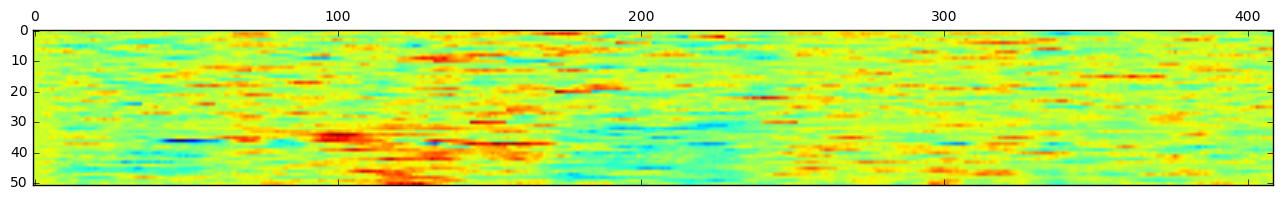

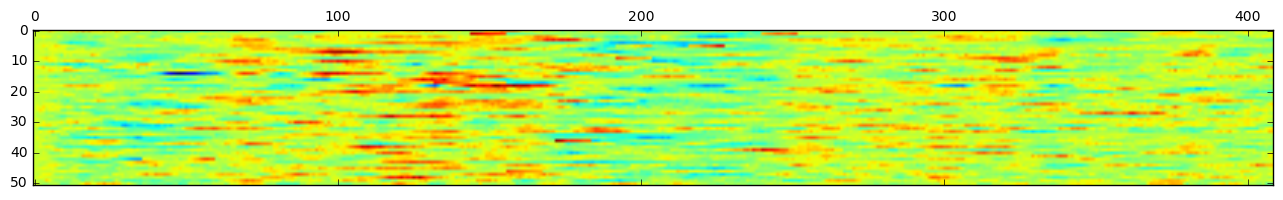

In [67]:
from operator import itemgetter
mm_sort=sorted(zip(array(fin_year_month_df.T),km.labels_),key=itemgetter(1))
mm_sort2=[el[0] for el in mm_sort]
matshow(mm_sort2, interpolation=None, aspect='auto')
matshow(fin_year_month_df.T, interpolation=None, aspect='auto')

In [40]:
from scipy.stats import kurtosis, skew
feat = [ [ mean(day), std(day), skew(day), kurtosis(day), 
           mean(day[1:]-day[:-1]), skew(day[1:]-day[:-1]), kurtosis(day[1:]-day[:-1]) ] #subtract the array elements starting from the second to the last with the elements starting from the first except the last, but why doe?
    for day in array(fin_year_month_df.T) ]

In [41]:
from sklearn.cluster import KMeans
km2 = KMeans(n_clusters=2)
km2.fit(feat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

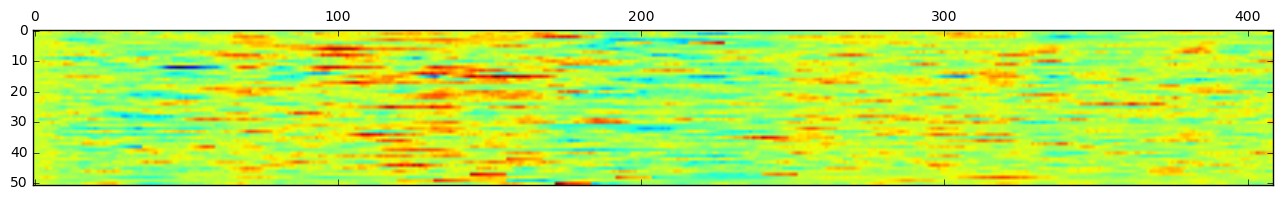

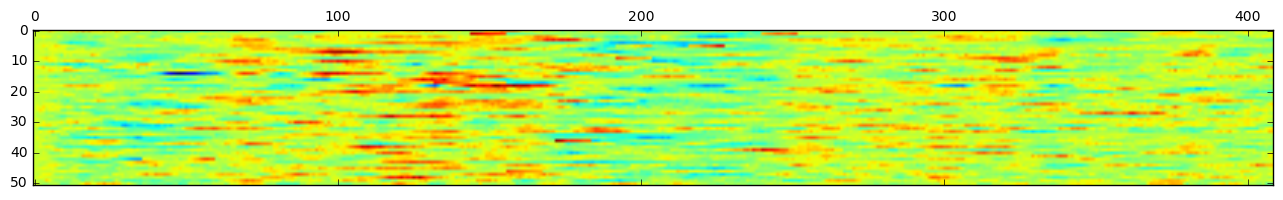

In [42]:
from operator import itemgetter # the idea is compute the features for each day and then cluster together the days with the most similar features?
mm_sort=sorted(zip(array(fin_year_month_df.T),km2.labels_),key=itemgetter(1)) #the cluster labels of the feature arrays are assigne to the days that have these featues
mm_sort2=[el[0] for el in mm_sort]
matshow(mm_sort2, interpolation=None, aspect='auto')
matshow(fin_year_month_df.T, interpolation=None, aspect='auto')

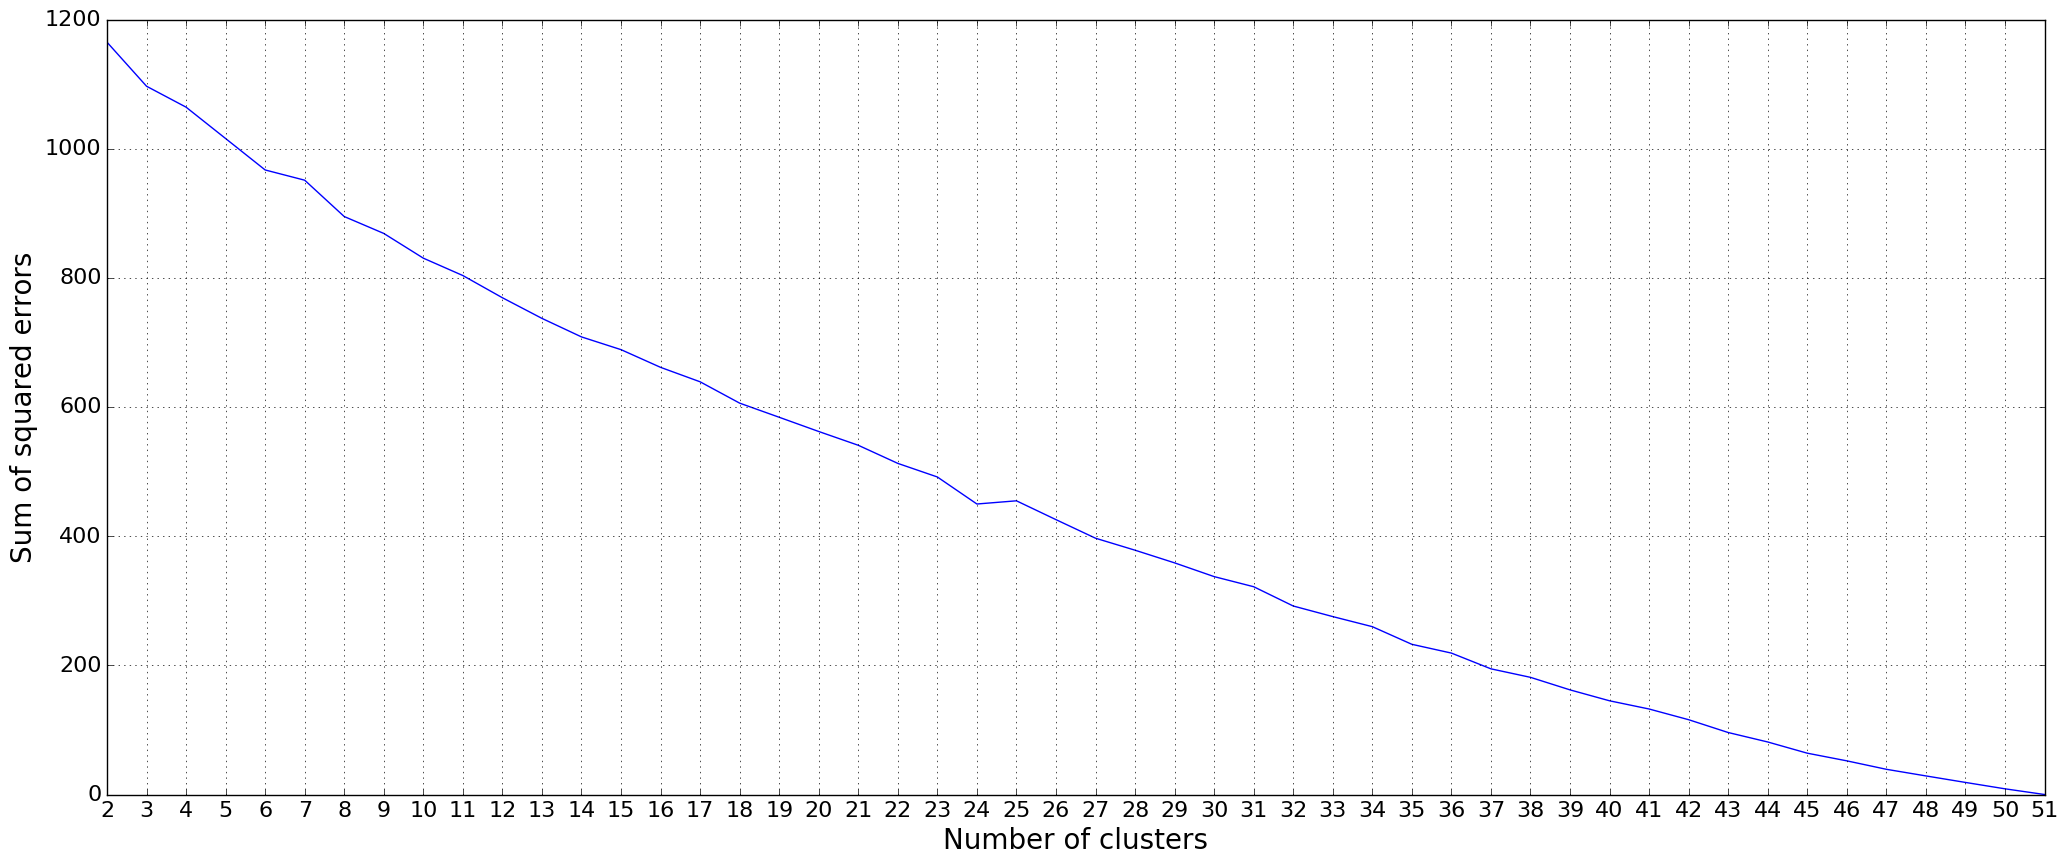

In [52]:
sse_list = list()
max_k = 52
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(fin_year_month_df.T)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list)
plt.grid(True)
xlim((2,51))
xticks(np.arange(2,52))
plt.xlabel("Number of clusters", fontsize=20)
plt.ylabel("Sum of squared errors", fontsize=20)
tick_params(axis='x', labelsize=16)
tick_params(axis='y', labelsize=16)

In [54]:
for k in range(2,51):
    initial_kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=300)
    initial_kmeans.fit(fin_year_month_df.T)
    print 'silhouette', silhouette_score(fin_year_month_df.T, initial_kmeans.labels_)
hist, bins = np.histogram(initial_kmeans.labels_, bins=range(0, len(set(initial_kmeans.labels_)) + 1))
print 'centers', initial_kmeans.cluster_centers_
print 'labels', dict(zip(bins, hist))
print 'sse', initial_kmeans.inertia_
print fin_year_month_df.columns

silhouette 0.0969696772574
silhouette 0.0762000254579
silhouette 0.0649748320521
silhouette 0.058697961764
silhouette 0.0559292775313
silhouette 0.0513249888898
silhouette 0.0474585870139
silhouette 0.0257851837687
silhouette 0.0104681645646
silhouette 0.0259456720005
silhouette 0.0134675920874
silhouette 0.0121831242789
silhouette 0.0200286634947
silhouette 0.00723049496546
silhouette 0.0338353930828
silhouette 0.00946296301245
silhouette 0.0276724556731
silhouette 0.0298934816863
silhouette 0.0202011650443
silhouette 0.01973758643
silhouette 0.0166303858942
silhouette 0.0237091921143
silhouette -0.00106675567069
silhouette 0.017463805895
silhouette 0.0219277403351
silhouette 0.0132442245617
silhouette -0.000676391357198
silhouette 0.0235708054458
silhouette 0.00433973668094
silhouette 0.019147885263
silhouette 0.0201166342132
silhouette 0.0113078801546
silhouette 0.0101177724945
silhouette 0.00947433971217
silhouette 0.0132724189297
silhouette 0.00844420829576
silhouette 0.0163750433